In [100]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

In [101]:
# Load the dataset
df = pd.read_csv('dataset/synthetic_social_media_dataset.csv')
df.head()

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content
0,user_0,post_8313,share,2023-09-21 12:04:21.361827,2023-10-17 12:04:21.278577,This is a post about politics
1,user_0,post_9516,like,2024-02-09 12:04:21.361827,2024-01-10 12:04:21.294581,This is a post about science
2,user_1,post_9405,comment,2024-06-28 12:04:21.361827,2023-12-30 12:04:21.294581,This is a post about sports
3,user_126,post_9405,seen,2023-11-01 12:04:21.381177,2023-12-30 12:04:21.294581,This is a post about sports
4,user_156,post_9405,seen,2024-01-25 12:04:21.381177,2023-12-30 12:04:21.294581,This is a post about sports


In [3]:
# Basic stats
print("Posts and interaction DataFrame Description:")
df.describe(include='all')

Posts and interaction DataFrame Description:


,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content
count,10437,10437,10437,10437,10437,10437
unique,1000,6501,4,9379,5931,5
top,user_913,post_4289,seen,2024-01-21 00:36:30.090988,2023-07-29 00:36:30.009119,This is a post about sports
freq,20,7,2690,4,9,2143


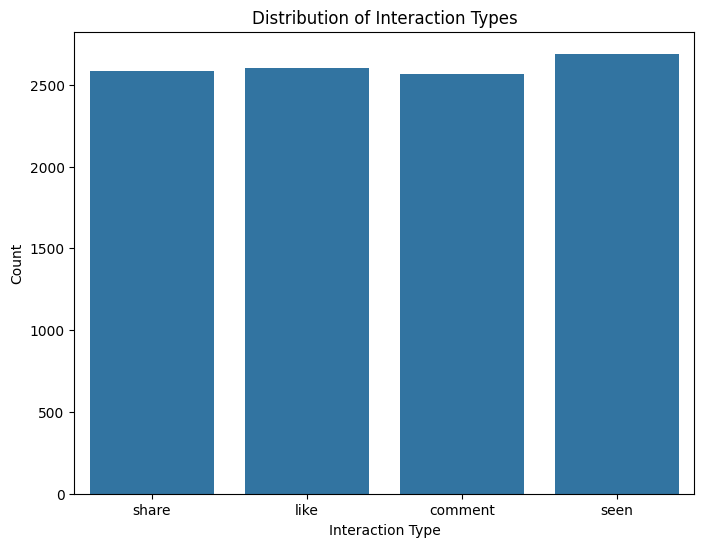

In [4]:
# Distribution of interaction types(Count plot)

plt.figure(figsize=(8, 6))
sns.countplot(x='Interaction_Type', data=df)
plt.title('Distribution of Interaction Types')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.show()

- All the Interaction types having simlar count. Seen is having little bit high.

In [5]:
df.head(1)

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics


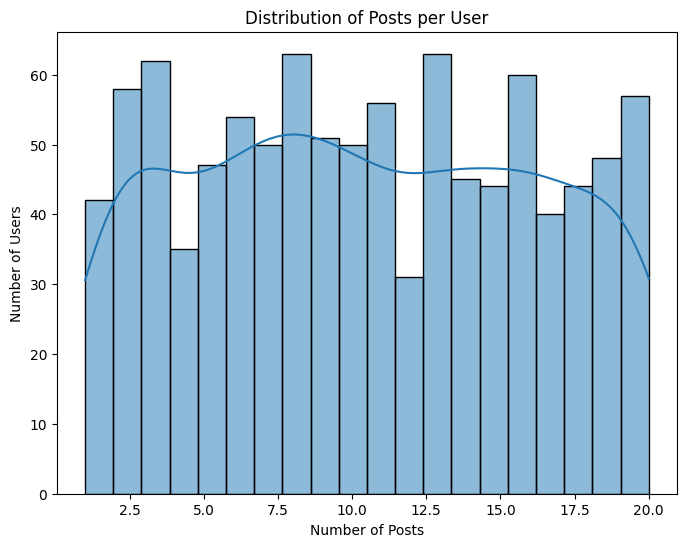

In [6]:
# Distribution of posts per user
posts_per_user = df['User_ID'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(posts_per_user, bins=20, kde=True)
plt.title('Distribution of Posts per User')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.show()

- It is illustrating how many posts each user has made, highlighting the variability in posting behavior among users.

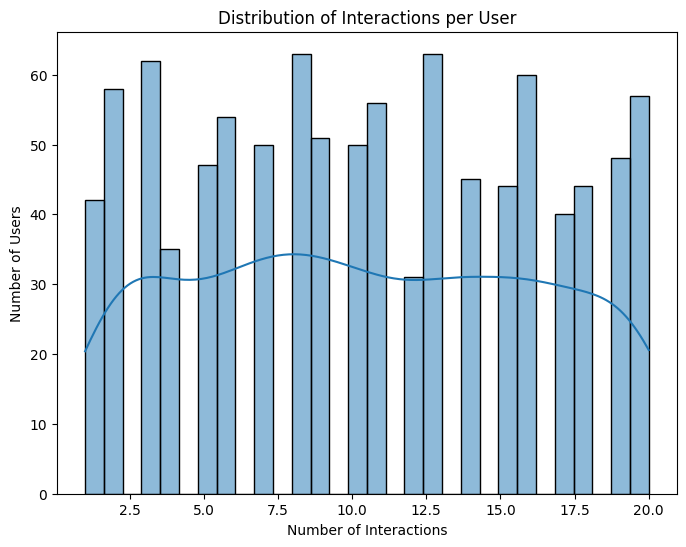

In [7]:
# Distribution of interactions per user
interactions_per_user = df['User_ID'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(interactions_per_user, bins=30, kde=True)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

- depicting the number of interactions each user has, demonstrating the engagement levels of different users

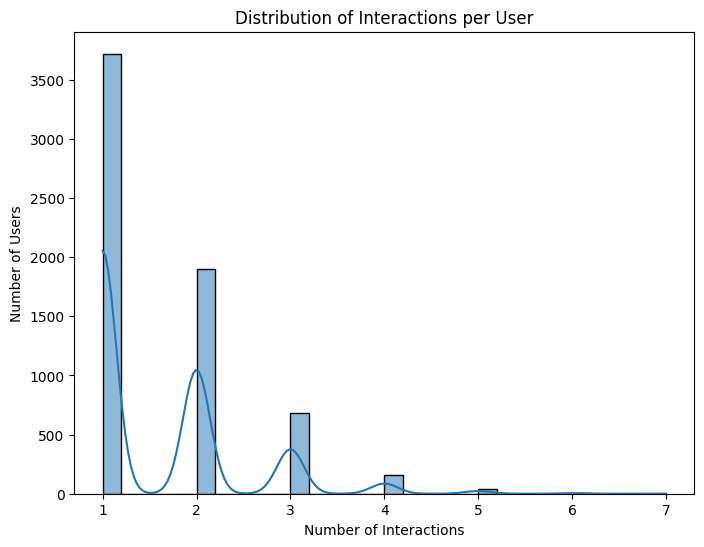

In [8]:
# Distribution of interactions per user
interactions_per_user = df['Post_ID'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(interactions_per_user, bins=30, kde=True)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

- depicting the number of interactions each user has, demonstrating the engagement levels of different users.


## Feature Engineering

In [9]:
# Encode interaction types (like share comment seen)
interaction_type_dummies = pd.get_dummies(df['Interaction_Type'])
df = pd.concat([df, interaction_type_dummies], axis=1)
df.head()

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content,comment,like,seen,share
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics,False,False,False,True
1,user_0,post_9516,like,2024-02-09 00:36:30.083462,2024-01-10 00:36:30.010124,This is a post about science,False,True,False,False
2,user_1,post_9405,comment,2024-06-28 00:36:30.083462,2023-12-30 00:36:30.009119,This is a post about sports,True,False,False,False
3,user_126,post_9405,seen,2023-11-01 00:36:30.101996,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False
4,user_156,post_9405,seen,2024-01-25 00:36:30.106999,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False


In [10]:
interaction_features = df.groupby(['User_ID', 'Post_ID']).agg({
    'like': 'sum',
    'comment': 'sum',
    'share': 'sum',
    'seen': 'sum'
}).reset_index()

interaction_features.head()

,User_ID,Post_ID,like,comment,share,seen
0,user_0,post_8313,0,0,1,0
1,user_0,post_9516,1,0,0,0
2,user_1,post_2713,0,0,0,1
3,user_1,post_4856,0,0,0,1
4,user_1,post_5412,1,0,0,0


In [11]:
df.head()

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content,comment,like,seen,share
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics,False,False,False,True
1,user_0,post_9516,like,2024-02-09 00:36:30.083462,2024-01-10 00:36:30.010124,This is a post about science,False,True,False,False
2,user_1,post_9405,comment,2024-06-28 00:36:30.083462,2023-12-30 00:36:30.009119,This is a post about sports,True,False,False,False
3,user_126,post_9405,seen,2023-11-01 00:36:30.101996,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False
4,user_156,post_9405,seen,2024-01-25 00:36:30.106999,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False


In [12]:
df['Post_Content'].unique()

array(['This is a post about politics', 'This is a post about science',
       'This is a post about sports',
       'This is a post about entertainment',
       'This is a post about technology'], dtype=object)

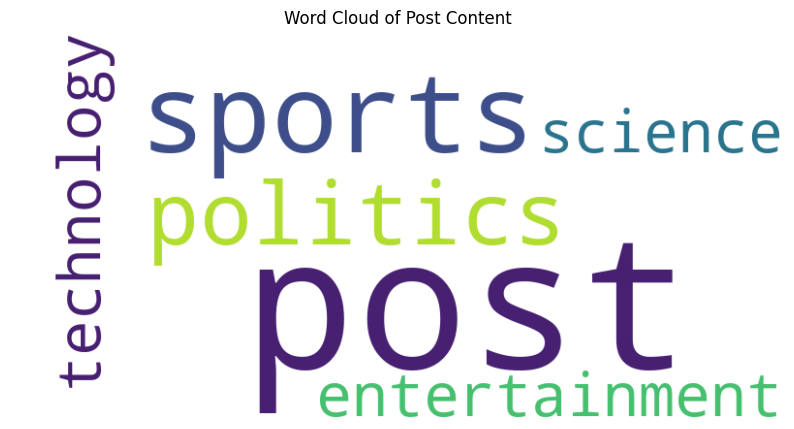

In [13]:
# Word cloud for post content
from wordcloud import WordCloud  # keywords from websites

all_text = ' '.join(df['Post_Content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content')
plt.show()

- most frequently used words in the post content, illustrating common topics and themes.

###  Content Feature -> post_content 
1. Lematizer
    - senetence to words
2. TF/IDF
    - words to vectors 

In [14]:
# post content Features
content= df[['Post_Content']]
content.head()

,Post_Content
0,This is a post about politics
1,This is a post about science
2,This is a post about sports
3,This is a post about sports
4,This is a post about sports


In [15]:
## Data Cleaning And Preprocessing for post_content feature usnig NLTK,TF-IDF
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer ,WordNetLemmatizer 
#stemmer = PorterStemmer() #faster
wordlemmatize=WordNetLemmatizer()  

corpus=[]
for i in range(0,len(content)):
    review=re.sub('[^a-zA-z]',' ',content['Post_Content'][i])
    review=review.lower()
    review=review.split()
    review=[wordlemmatize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
corpus[:10]

['post politics',
 'post science',
 'post sport',
 'post sport',
 'post sport',
 'post entertainment',
 'post technology',
 'post technology',
 'post sport',
 'post sport']

In [18]:
#Extract TF-IDF features from corpus

tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [19]:
df.head()

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content,comment,like,seen,share
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics,False,False,False,True
1,user_0,post_9516,like,2024-02-09 00:36:30.083462,2024-01-10 00:36:30.010124,This is a post about science,False,True,False,False
2,user_1,post_9405,comment,2024-06-28 00:36:30.083462,2023-12-30 00:36:30.009119,This is a post about sports,True,False,False,False
3,user_126,post_9405,seen,2023-11-01 00:36:30.101996,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False
4,user_156,post_9405,seen,2024-01-25 00:36:30.106999,2023-12-30 00:36:30.009119,This is a post about sports,False,False,True,False


In [25]:
# Extract date from timestamps
df['post_date'] = df['Post_Timestamp'].dt.date
df['interaction_date'] = df['Interaction_Timestamp'].dt.date

In [26]:
df.head(2)

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content,comment,like,seen,share,post_date,interaction_date
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics,False,False,False,True,2023-10-17,2023-09-21
1,user_0,post_9516,like,2024-02-09 00:36:30.083462,2024-01-10 00:36:30.010124,This is a post about science,False,True,False,False,2024-01-10,2024-02-09


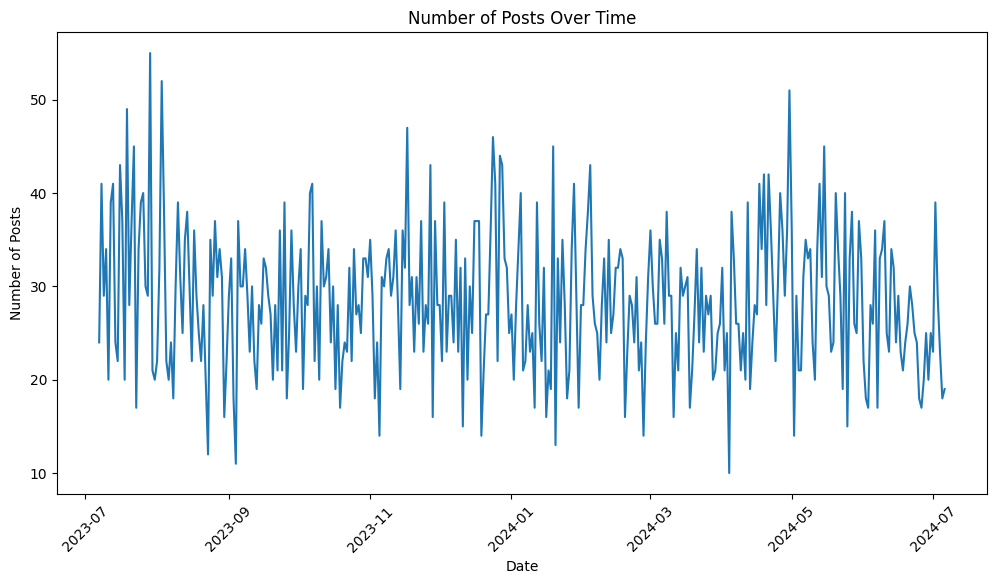

In [29]:
# Number of posts over time
posts_over_time = df['post_date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
posts_over_time.plot()
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

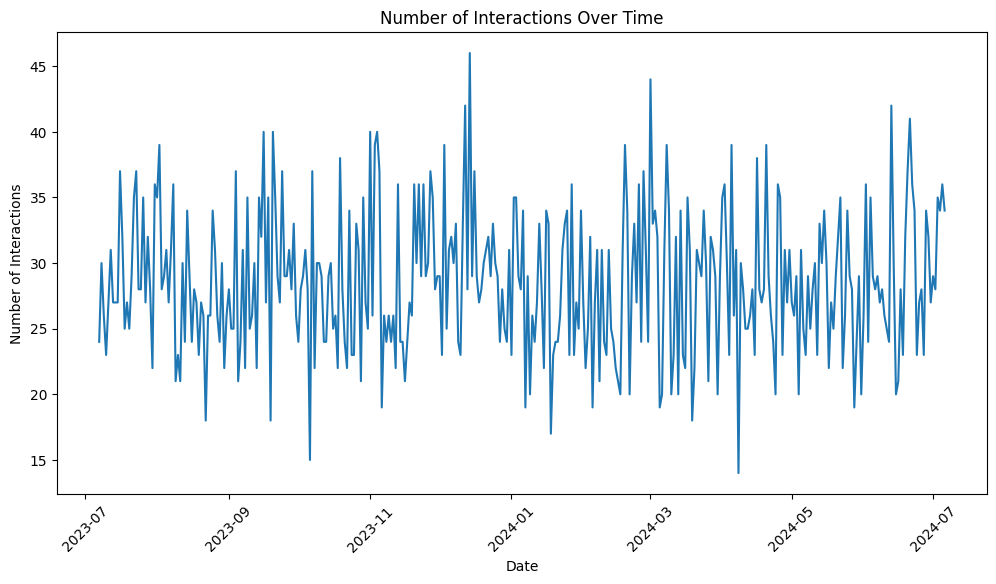

In [30]:
# Number of interactions over time
interactions_over_time = df['interaction_date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
interactions_over_time.plot()
plt.title('Number of Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

In [31]:
df.drop(labels=['post_date','interaction_date'],axis=1,inplace=True)

In [33]:
df.head(2)

,User_ID,Post_ID,Interaction_Type,Interaction_Timestamp,Post_Timestamp,Post_Content,comment,like,seen,share
0,user_0,post_8313,share,2023-09-21 00:36:30.083462,2023-10-17 00:36:29.988260,This is a post about politics,False,False,False,True
1,user_0,post_9516,like,2024-02-09 00:36:30.083462,2024-01-10 00:36:30.010124,This is a post about science,False,True,False,False


In [34]:
# Convert timestamps to datetime
df['Post_Timestamp'] = pd.to_datetime(df['Post_Timestamp'])
df['Interaction_Timestamp'] = pd.to_datetime(df['Interaction_Timestamp'])

In [36]:
# Calculate the time difference between post and interaction
# Calculate post recency in days
df['post_recency_days'] = (datetime.now() - df['Post_Timestamp']).dt.days

In [37]:
# Combine Features
features_df = pd.concat([interaction_features, tfidf_df, df[['post_recency_days']]], axis=1)

In [43]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            10437 non-null  object 
 1   Post_ID            10437 non-null  object 
 2   like               10437 non-null  float64
 3   comment            10437 non-null  float64
 4   share              10437 non-null  float64
 5   seen               10437 non-null  float64
 6   entertainment      10437 non-null  float64
 7   politics           10437 non-null  float64
 8   post               10437 non-null  float64
 9   science            10437 non-null  float64
 10  sport              10437 non-null  float64
 11  technology         10437 non-null  float64
 12  post_recency_days  10437 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 1.0+ MB


In [51]:
# Handle missing values by filling NaNs with 0
features_df = features_df.fillna(0)

num_nan = features_df.select_dtypes(exclude='O').columns
cat_nan = features_df.select_dtypes(include='O').columns
print(num_nan)
print(cat_nan)

Index(['like', 'comment', 'share', 'seen', 'entertainment', 'politics', 'post',
       'science', 'sport', 'technology', 'post_recency_days'],
      dtype='object')
Index(['User_ID', 'Post_ID'], dtype='object')


In [52]:
# Fill missing categorical and numnerical values with the most frequent category

for column in cat_nan:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)
for column in num_nan:
    features_df[column].fillna(features_df[column].median(), inplace=True)


In [53]:
features_df.isnull().sum()

User_ID              0
Post_ID              0
like                 0
comment              0
share                0
seen                 0
entertainment        0
politics             0
post                 0
science              0
sport                0
technology           0
post_recency_days    0
dtype: int64

In [54]:
features_df.head()

,User_ID,Post_ID,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days
0,user_0,post_8313,0.0,0.0,1.0,0.0,0.0,0.932674,0.360721,0.000000,0.000000,0.0,263
1,user_0,post_9516,1.0,0.0,0.0,0.0,0.0,0.000000,0.352963,0.935637,0.000000,0.0,178
2,user_1,post_2713,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189
3,user_1,post_4856,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189
4,user_1,post_5412,1.0,0.0,0.0,0.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189


In [55]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            10437 non-null  object 
 1   Post_ID            10437 non-null  object 
 2   like               10437 non-null  float64
 3   comment            10437 non-null  float64
 4   share              10437 non-null  float64
 5   seen               10437 non-null  float64
 6   entertainment      10437 non-null  float64
 7   politics           10437 non-null  float64
 8   post               10437 non-null  float64
 9   science            10437 non-null  float64
 10  sport              10437 non-null  float64
 11  technology         10437 non-null  float64
 12  post_recency_days  10437 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 1.0+ MB


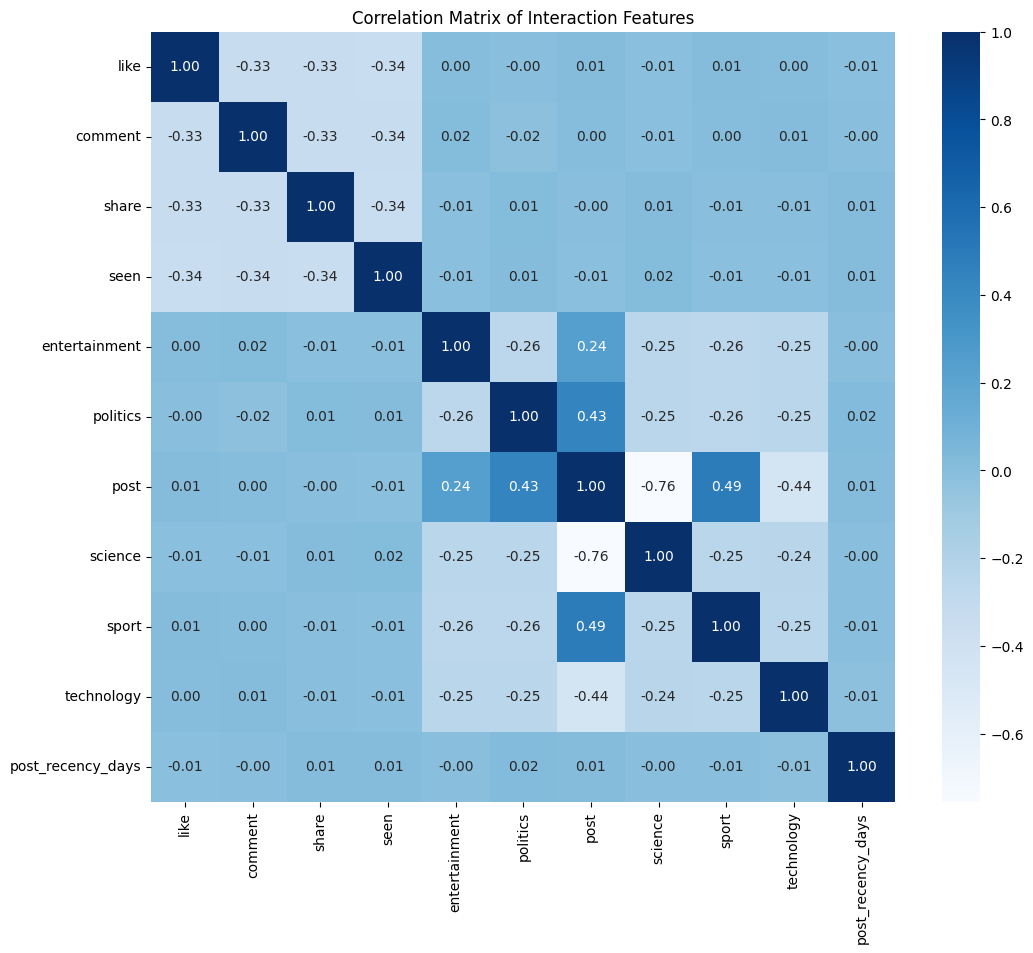

In [59]:
# Ensure only numeric columns are included in the correlation matrix
numeric_df = features_df.select_dtypes(include=[np.number])

# Create correlation matrix
interaction_corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(interaction_corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Interaction Features')
plt.show()

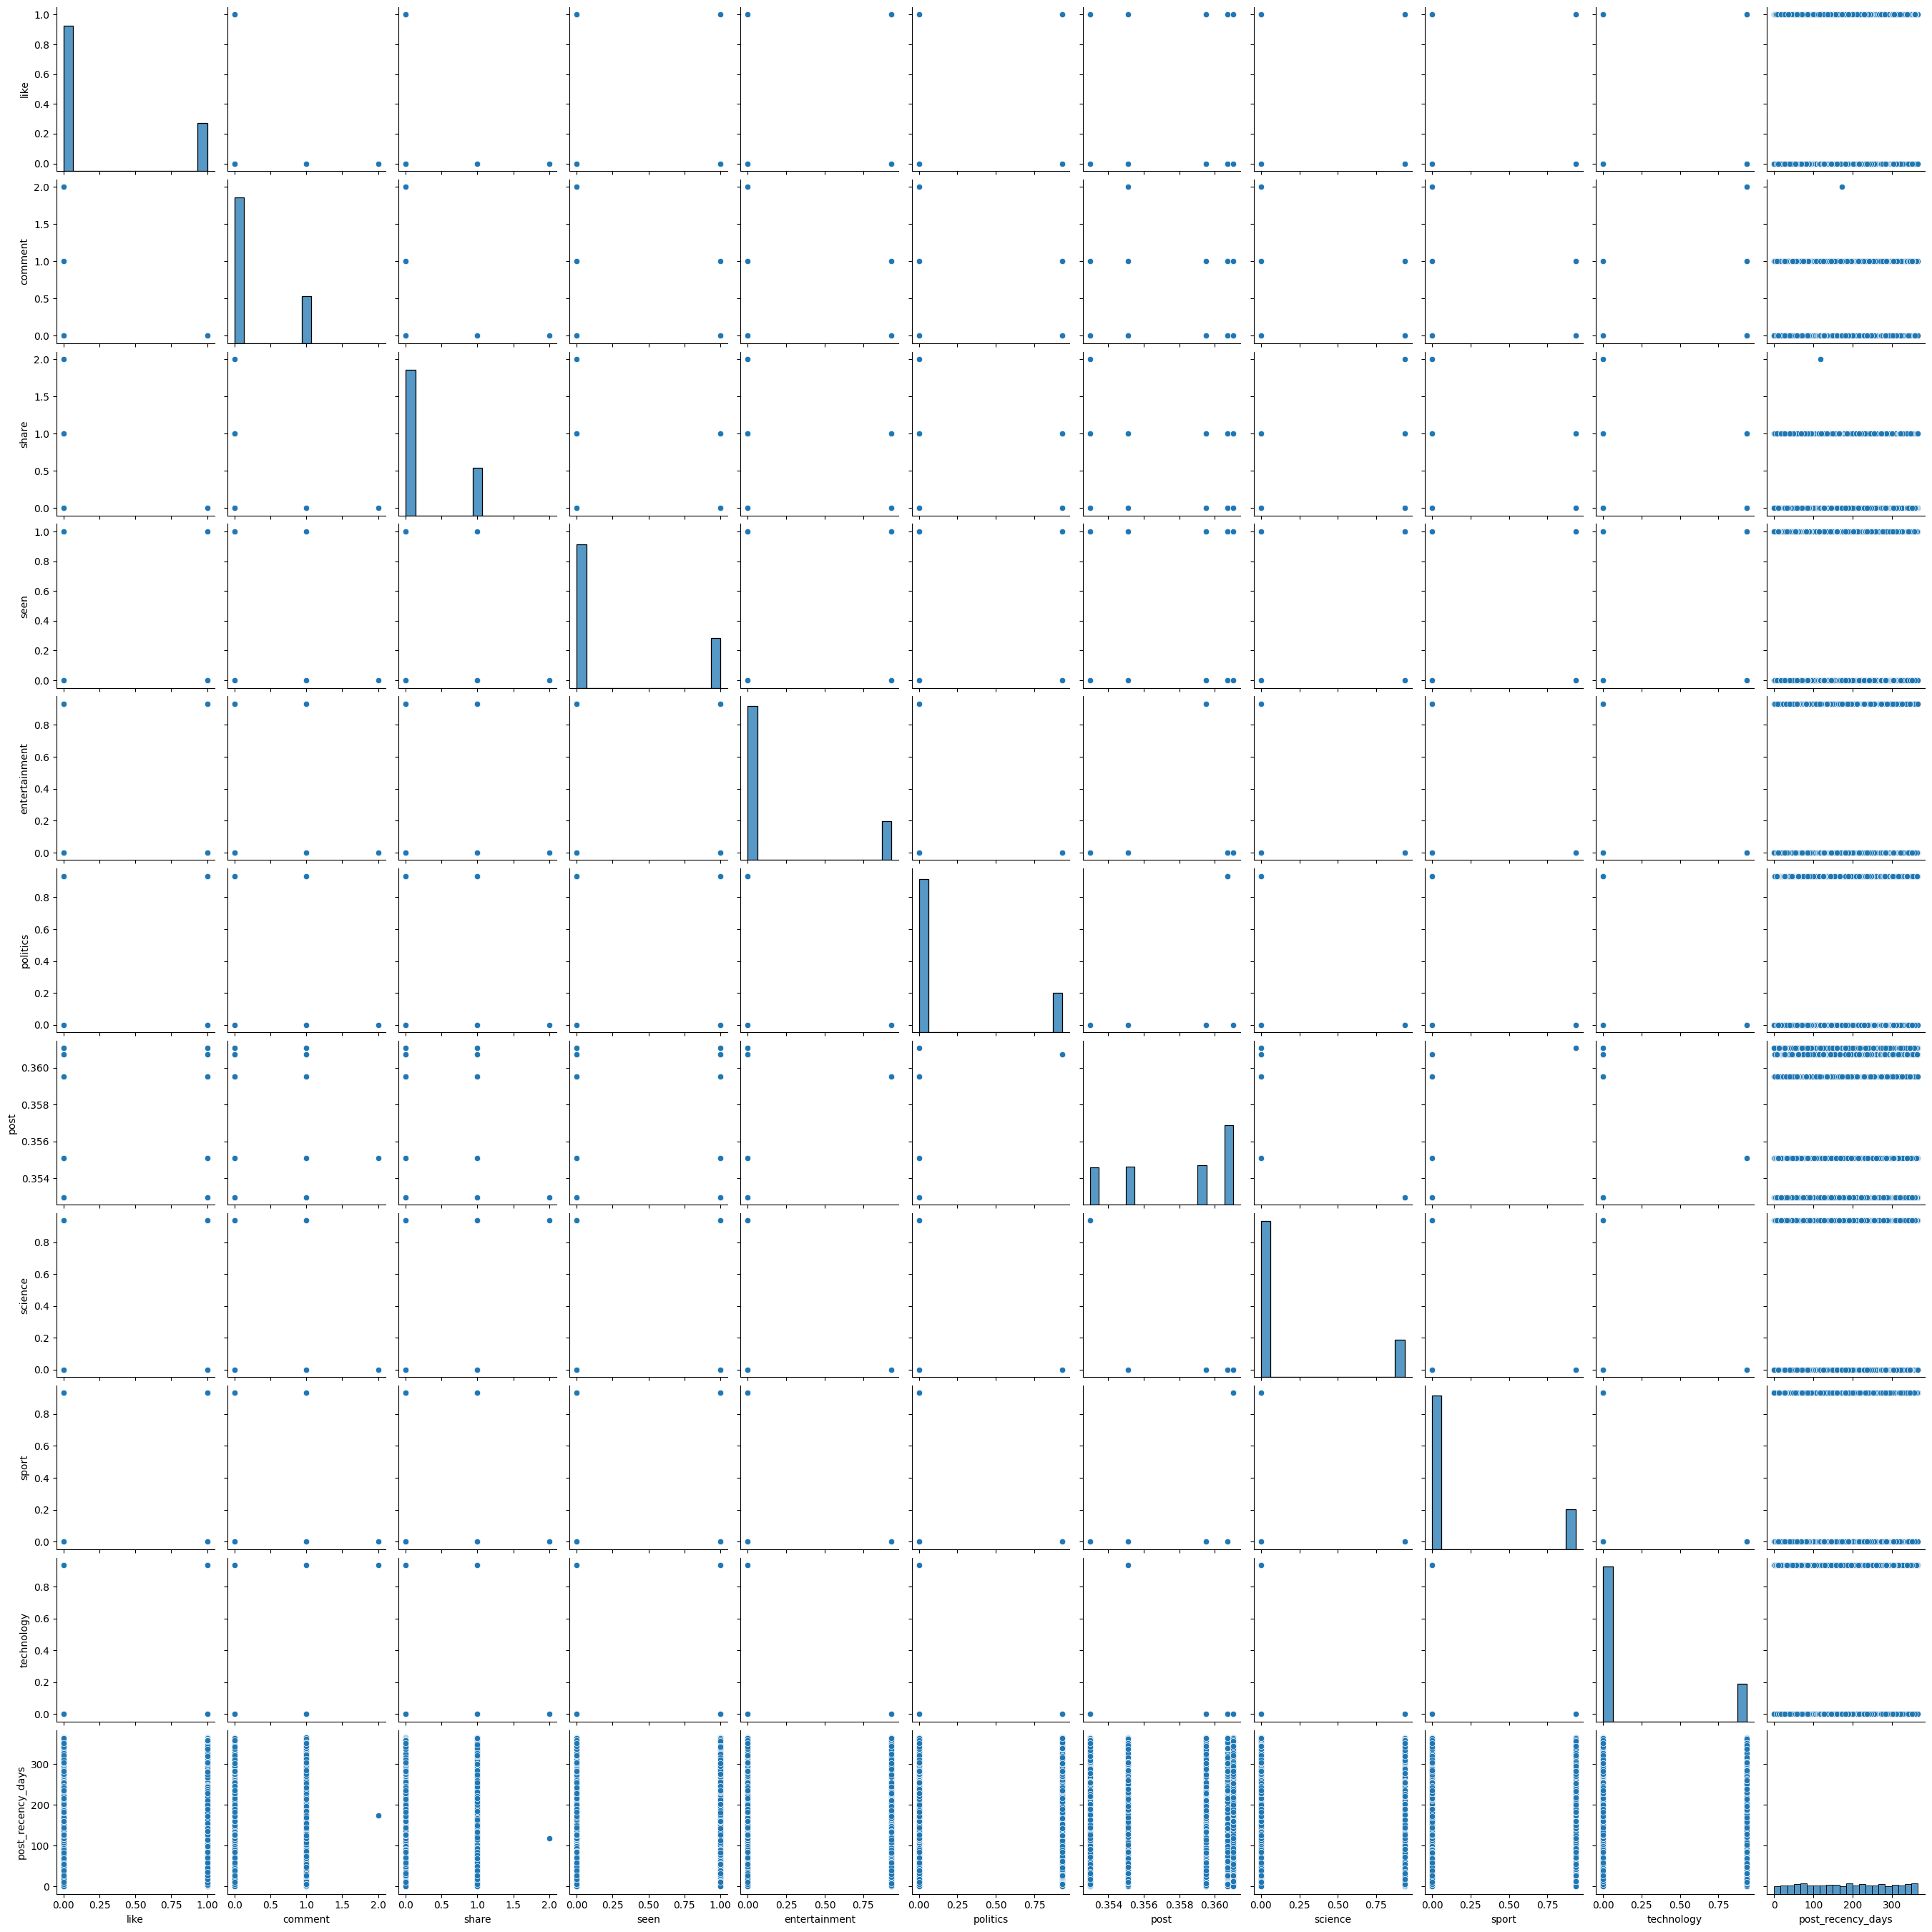

In [60]:
sns.pairplot(features_df)

## Model Training

In [61]:
# Define target variable
features_df['Relevant'] = df['like'] + df['comment'] + df['share'] > 0

# Ensure no NaN values in the target variable
# features_df['Relevant'] = features_df['Relevant'].fillna(0).astype(int)

In [62]:
features_df['Relevant'].isnull().sum()

0

In [63]:
features_df.head()

,User_ID,Post_ID,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days,Relevant
0,user_0,post_8313,0.0,0.0,1.0,0.0,0.0,0.932674,0.360721,0.000000,0.000000,0.0,263,True
1,user_0,post_9516,1.0,0.0,0.0,0.0,0.0,0.000000,0.352963,0.935637,0.000000,0.0,178,True
2,user_1,post_2713,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189,True
3,user_1,post_4856,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189,False
4,user_1,post_5412,1.0,0.0,0.0,0.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189,False


In [64]:
# Split the data
X = features_df.drop(['User_ID', 'Post_ID', 'Relevant'], axis=1)
y = features_df['Relevant']

In [65]:
X.head()

,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days
0,0.0,0.0,1.0,0.0,0.0,0.932674,0.360721,0.000000,0.000000,0.0,263
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.352963,0.935637,0.000000,0.0,178
2,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189
3,0.0,0.0,0.0,1.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.361061,0.000000,0.932542,0.0,189


In [66]:
#feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5]
# Split the data again into training and testing sets


array([[-0.57628079, -0.57023269,  1.74329788, -0.58926326, -0.50427806,
         1.97077382,  0.85437422, -0.48718005, -0.50831049, -0.49274324,
         0.73570593],
       [ 1.73526519, -0.57023269, -0.57303566, -0.58926326, -0.50427806,
        -0.5074149 , -1.54995193,  2.05262922, -0.50831049, -0.49274324,
        -0.06683622],
       [-0.57628079, -0.57023269, -0.57303566,  1.69703437, -0.50427806,
        -0.5074149 ,  0.95987117, -0.48718005,  1.96730153, -0.49274324,
         0.03702218],
       [-0.57628079, -0.57023269, -0.57303566,  1.69703437, -0.50427806,
        -0.5074149 ,  0.95987117, -0.48718005,  1.96730153, -0.49274324,
         0.03702218],
       [ 1.73526519, -0.57023269, -0.57303566, -0.58926326, -0.50427806,
        -0.5074149 ,  0.95987117, -0.48718005,  1.96730153, -0.49274324,
         0.03702218]])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
X_train

array([[ 1.73526519, -0.57023269, -0.57303566, ..., -0.50831049,
        -0.49274324, -0.33120305],
       [-0.57628079, -0.57023269,  1.74329788, ..., -0.50831049,
        -0.49274324,  0.99063108],
       [-0.57628079, -0.57023269, -0.57303566, ..., -0.50831049,
        -0.49274324,  0.56575583],
       ...,
       [-0.57628079,  1.75185806, -0.57303566, ..., -0.50831049,
        -0.49274324,  0.83956433],
       [-0.57628079,  1.75185806, -0.57303566, ..., -0.50831049,
        -0.49274324, -0.62389489],
       [-0.57628079, -0.57023269, -0.57303566, ..., -0.50831049,
         2.02945452, -0.69942827]])

In [72]:
X_train.shape,X_test.shape

((7827, 11), (2610, 11))

In [73]:
#Evaluate Model

def evaluate_model(true,pred):
   acc = accuracy_score(true,pred)
   return acc

In [74]:
models = {
   'LogisticRegression':LogisticRegression(),
   'Decision Tree':DecisionTreeClassifier(),
   'Random Forest':RandomForestClassifier(),
   'Support vector Machine':SVC(),
   'KNN':KNeighborsClassifier()
}
model_list = []
acc_list=[]

for i in range(len(list(models))):
   model = list(models.values())[i]
   model.fit(X_train,y_train)

   #make prediction
   y_pred = model.predict(X_test)

   acc = evaluate_model(y_test,y_pred)

   print(list(models.keys())[i])
   model_list.append(list(models.keys())[i])

   print('Model Traning Performance')
   print('Accuracy_score',acc)

   acc_list.append(acc)

   print('='*25)
   print('\n')

LogisticRegression
Model Traning Performance
Accuracy_score 0.746743295019157


Decision Tree
Model Traning Performance
Accuracy_score 0.5762452107279693


Random Forest
Model Traning Performance
Accuracy_score 0.6425287356321839


Support vector Machine
Model Traning Performance
Accuracy_score 0.746743295019157


KNN
Model Traning Performance
Accuracy_score 0.6919540229885057




In [75]:
print('classification_report: ','\n',classification_report(y_test,y_pred))
print('\n')
print('confusion_matrix: ','\n',confusion_matrix(y_test,y_pred))

classification_report:  
               precision    recall  f1-score   support

       False       0.28      0.14      0.19       661
        True       0.75      0.88      0.81      1949

    accuracy                           0.69      2610
   macro avg       0.52      0.51      0.50      2610
weighted avg       0.63      0.69      0.65      2610



confusion_matrix:  
 [[  93  568]
 [ 236 1713]]


In [76]:
#Best Model FOunf Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [77]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold()
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params = dict(penalty=penalty,C=c_values,solver=solver)

In [78]:
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [79]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [80]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [81]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [82]:
grid.best_score_

0.7407691397467755

In [83]:

y_pred = grid.predict(X_test)
score = accuracy_score(y_test,y_pred)

print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test,y_pred))

0.746743295019157
[[   0  661]
 [   0 1949]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       661
        True       0.75      1.00      0.86      1949

    accuracy                           0.75      2610
   macro avg       0.37      0.50      0.43      2610
weighted avg       0.56      0.75      0.64      2610



In [84]:
# Save the model

import joblib

joblib.dump(model, 'logistic_regression.joblib')

['logistic_regression.joblib']

In [85]:
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
# Define the generate_feed function
def generate_feed(user_id, model, features_df):
    user_posts = features_df[features_df['User_ID'] == user_id].copy()
    user_X = user_posts.drop(['User_ID', 'Post_ID', 'Relevant'], axis=1)
    user_posts['Relevance_Score'] = model.predict_proba(user_X)[:, 1]
    return user_posts.sort_values(by='Relevance_Score', ascending=False)


# Get unique user IDs
user_ids = features_df['User_ID'].unique()
user_ids

array(['user_0', 'user_1', 'user_10', ..., 'user_998', 'user_999', 0],
      dtype=object)

In [87]:
user_ids[1]

'user_1'

In [88]:

#Testing
# Generate a sample feed for a user
sample_user_id = user_ids[1]
sample_feed = generate_feed(sample_user_id, model, features_df)
sample_feed.head()


,User_ID,Post_ID,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days,Relevant,Relevance_Score
6,user_1,post_7423,0.0,0.0,1.0,0.0,0.0,0.0,0.355109,0.0,0.000000,0.934825,314,False,0.999972
7,user_1,post_8555,0.0,0.0,1.0,0.0,0.0,0.0,0.355109,0.0,0.000000,0.934825,314,False,0.999972
8,user_1,post_8769,0.0,0.0,1.0,0.0,0.0,0.0,0.361061,0.0,0.932542,0.000000,253,False,0.999832
9,user_1,post_9383,0.0,0.0,0.0,1.0,0.0,0.0,0.361061,0.0,0.932542,0.000000,253,True,0.999830
10,user_1,post_9384,0.0,0.0,0.0,1.0,0.0,0.0,0.361061,0.0,0.932542,0.000000,253,False,0.999830


In [89]:
#Testing
# Generate a sample feed for a user
sample_user_id = user_ids[10]
sample_feed = generate_feed(sample_user_id, model, features_df)
sample_feed.head()


,User_ID,Post_ID,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days,Relevant,Relevance_Score
104,user_107,post_4944,0.0,0.0,1.0,0.0,0.000000,0.0,0.352963,0.935637,0.0,0.0,282,True,0.999928
105,user_107,post_7091,0.0,0.0,1.0,0.0,0.933135,0.0,0.359527,0.000000,0.0,0.0,43,True,0.914568


In [90]:
#deployment

# Save the model and the features_df

import joblib

joblib.dump(model, 'logistic_regression.joblib')
joblib.dump(features_df, 'features_df.joblib')
# Load the model and features_df

loaded_model = joblib.load('logistic_regression.joblib')
loaded_features_df = joblib.load('features_df.joblib')

# Generate a sample feed for a user

sample_user_id = user_ids[10]
sample_feed = generate_feed(sample_user_id, loaded_model, loaded_features_df)
sample_feed.head()



,User_ID,Post_ID,like,comment,share,seen,entertainment,politics,post,science,sport,technology,post_recency_days,Relevant,Relevance_Score
104,user_107,post_4944,0.0,0.0,1.0,0.0,0.000000,0.0,0.352963,0.935637,0.0,0.0,282,True,0.999928
105,user_107,post_7091,0.0,0.0,1.0,0.0,0.933135,0.0,0.359527,0.000000,0.0,0.0,43,True,0.914568


In [91]:
# Test the loaded model

loaded_sample_feed = loaded_model.predict_proba(loaded_features_df[loaded_features_df['User_ID'] == sample_user_id].drop(['User_ID', 'Post_ID', 'Relevant'], axis=1))[:, 1]
loaded_sample_feed


array([0.99992755, 0.91456803])

In [92]:
# web integration flask

from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/generate_feed', methods=['POST'])

def generate_feed_api():
    user_id = request.json['user_id']
    loaded_model = joblib.load('logistic_regression.joblib')
    loaded_features_df = joblib.load('features_df.joblib')
    sample_feed = generate_feed(user_id, loaded_model, loaded_features_df)
    return jsonify(sample_feed.to_dict('records'))

if __name__ == '__main__':
    app.run(debug=True)

    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1